# **GLOBAL TRADE ANALYSIS - EDA**

---



GIRISH NAIDU RA2111004010037


SAHITYA SAHIL RA2111004010062

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Highlighting the maixmum values of each attribute in the data set

In [4]:
df=pd.read_csv('Raw data.csv')
df.shape

(59090, 10)

In [5]:
df.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Australia,2016,10111,"Horses, live pure-bred breeding",Export,128577553,900450.0,Number of items,1882.0,01_live_animals
1,Australia,2016,10119,"Horses, live except pure-bred breeding",Re-Import,4928989,47240.0,Number of items,104.0,01_live_animals
2,Australia,2016,10119,"Horses, live except pure-bred breeding",Export,11812782,153587.0,Number of items,276.0,01_live_animals
3,Australia,2016,10119,"Horses, live except pure-bred breeding",Import,90430302,1082493.0,Number of items,2073.0,01_live_animals
4,Australia,2016,10120,"Asses, mules and hinnies, live",Export,58473,5805.0,Number of items,416.0,01_live_animals


Dropping unwanted column

In [6]:
df.drop(columns='quantity_name', axis=1, inplace=True)

In [7]:
df.shape

(59090, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59090 entries, 0 to 59089
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  59090 non-null  object 
 1   year             59090 non-null  int64  
 2   comm_code        59090 non-null  int64  
 3   commodity        59090 non-null  object 
 4   flow             59090 non-null  object 
 5   trade_usd        59090 non-null  int64  
 6   weight_kg        58375 non-null  float64
 7   quantity         58385 non-null  float64
 8   category         59090 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 4.1+ MB


Checking for the null values

In [9]:
df.isnull().sum()

country_or_area      0
year                 0
comm_code            0
commodity            0
flow                 0
trade_usd            0
weight_kg          715
quantity           705
category             0
dtype: int64

In [10]:
# filling the null values of 'weight_kg' with the mean of that column
df['weight_kg'].fillna(df['weight_kg'].mean(),inplace=True)

In [11]:
# filling the null values of 'quantity' with the median of that column
df['quantity'].fillna(df['quantity'].median(),inplace=True)

Rechecking for any null columns

In [12]:
df.isnull().sum()

country_or_area    0
year               0
comm_code          0
commodity          0
flow               0
trade_usd          0
weight_kg          0
quantity           0
category           0
dtype: int64

In [13]:
df.describe()

,year,comm_code,trade_usd,weight_kg,quantity
count,59090.000000,59090.000000,5.909000e+04,5.909000e+04,5.909000e+04
mean,2002.756253,64722.199729,3.106777e+07,8.739387e+07,8.701590e+07
std,8.132804,33712.160061,2.539088e+08,2.830906e+09,2.831092e+09
min,1988.000000,10111.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,1996.000000,30559.000000,6.784725e+04,1.889650e+04,1.962025e+04
50%,2003.000000,70690.000000,8.304485e+05,2.929720e+05,2.853530e+05
75%,2010.000000,90620.000000,7.307652e+06,3.496804e+06,3.223997e+06
max,2016.000000,121490.000000,1.373323e+10,6.144370e+11,6.144370e+11


**The 50th percentile i.e. the Median value < Mean value OR Mean > Median --> SKEWED DATA**

Removing some unwanted columns with 'flow' = Re-Import

In [14]:
# Creating a mask to remove specific columns
mask = df['flow'] == 'Re-Import'
df1 = df[~mask]

In [15]:
#Rechecking if the rows are removed or not
df1.shape

(54340, 9)

In [16]:
#Again doing the same with 'flow'= Re-Export
mask = df1['flow'] == 'Re-Export'
df2 = df1[~mask]

In [17]:
df2.shape

(47635, 9)

Checking the distribution of target variable

In [18]:
df2['flow'].value_counts()

Export    23943
Import    23692
Name: flow, dtype: int64

In [19]:
# encoding the target column
label_encode = LabelEncoder()

labels = label_encode.fit_transform(df2['flow'])
df2['target'] = labels
df2.drop(columns='flow', axis=1, inplace=True)

<ipython-input-19-dc6a6b9908b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target'] = labels
<ipython-input-19-dc6a6b9908b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='flow', axis=1, inplace=True)


In [20]:
#Flow column removed
df2.head()

,country_or_area,year,comm_code,commodity,trade_usd,weight_kg,quantity,category,target
0,Australia,2016,10111,"Horses, live pure-bred breeding",128577553,900450.0,1882.0,01_live_animals,0
2,Australia,2016,10119,"Horses, live except pure-bred breeding",11812782,153587.0,276.0,01_live_animals,0
3,Australia,2016,10119,"Horses, live except pure-bred breeding",90430302,1082493.0,2073.0,01_live_animals,1
4,Australia,2016,10120,"Asses, mules and hinnies, live",58473,5805.0,416.0,01_live_animals,0
5,Australia,2016,10120,"Asses, mules and hinnies, live",5221,1000.0,2.0,01_live_animals,1


In [21]:
df2['target'].value_counts()

0    23943
1    23692
Name: target, dtype: int64

For the above:

Export -> 0

Import -> 1

The data above is almost balanced.

In [22]:
# Grouping the data based on target

df2.groupby('target').mean()

<ipython-input-22-0666194d8c56>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('target').mean()


,year,comm_code,trade_usd,weight_kg,quantity
target,,,,,
0,2002.224492,62949.580086,5.665225e+07,1.659353e+08,1.642887e+08
1,2002.102355,64945.490588,1.990710e+07,4.928063e+07,5.074976e+07


Hypothesis Testing

In [25]:
# considering the trade_usd column for hypothesis testing
trade_mean = df2['trade_usd'].mean()
print(trade_mean)

38376483.65699591


In [28]:
# Taking a sample
trade_sample = (16242005,7714062,2785971,57646013,1439320,1337,1880,241421,21621,21572)

# changing the input data into numpy array
input_data_as_numpy_array = np.asarray(trade_sample)

In [29]:
from scipy.stats import ttest_1samp

In [30]:
ttest,p_value = ttest_1samp(trade_sample,trade_mean)

In [31]:
print(p_value)

0.0005416728746710193


In [32]:
if p_value < 0.05:    #alpha value is 0.05 or 5%
  print("Rejecting Null Hypothesis")
else:
  print("Accepting Null Hypothesis")

Rejecting Null Hypothesis


# **DATA VISUALIZATION**

<Axes: xlabel='target', ylabel='count'>

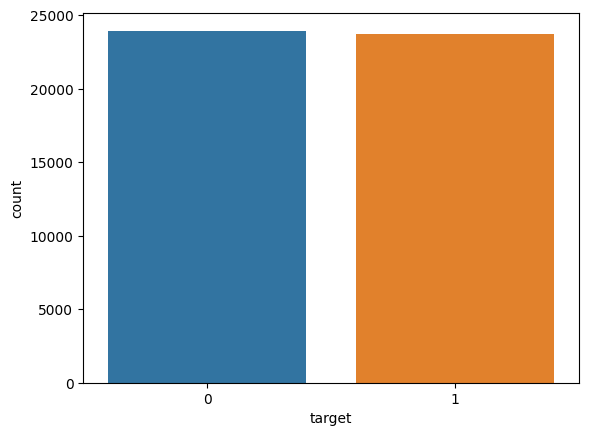

In [24]:
# countplot for the target column for checking the distribution of the target
sns.countplot(x='target', data=df2)

Distribution plot for all columns

In [25]:
# this is how we can get all the column names of the dataframe
for column in df2:
  print(column)

country_or_area
year
comm_code
commodity
trade_usd
weight_kg
quantity
category
target


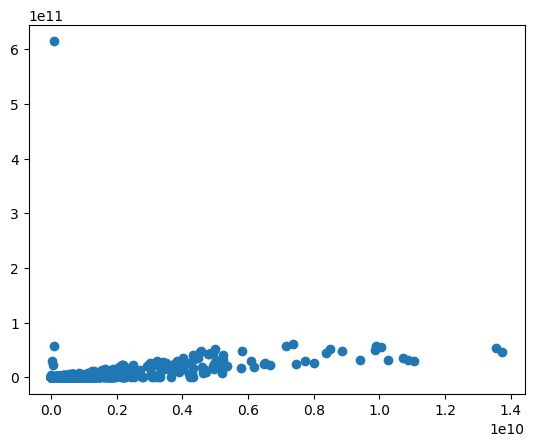

In [26]:
# scatterplot for 1st feature(x) alongwith second feature(y)
plt.scatter(x=df2.trade_usd, y=df2.weight_kg)

In [27]:
correlation_matrix = df2.corr()

<ipython-input-27-15450d8dcb01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


**Heat map to visualize the correlation matrix:**

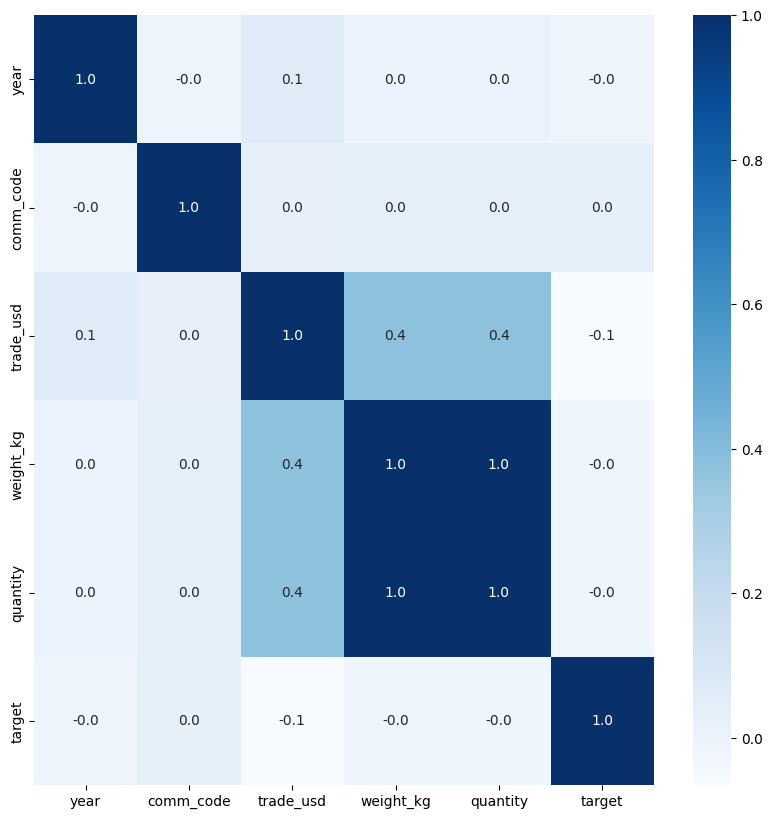

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat Map')

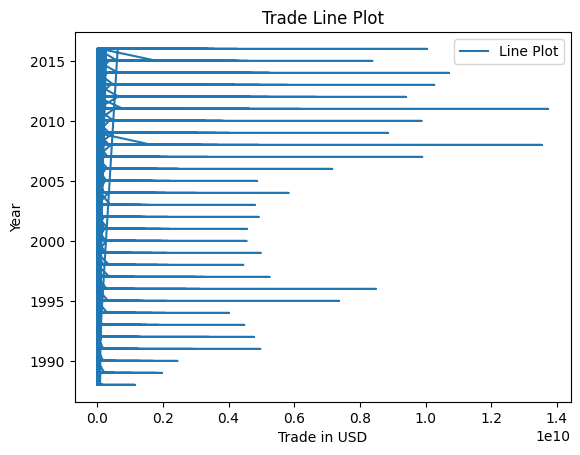

In [30]:
plt.plot(df2['trade_usd'],df2['year'], label='Line Plot')
plt.xlabel('Trade in USD')
plt.ylabel('Year')
plt.title('Trade Line Plot')
plt.legend()
plt.show()

# **PREDICTION MODEL**

In [ ]:
# dropping the string type columns
df2 = df2.drop(columns = 'country_or_area', axis=1)

In [ ]:
# dropping the string type columns
df2 = df2.drop(columns = 'commodity', axis=1)

In [ ]:
# dropping the string type columns
df2 = df2.drop(columns = 'category', axis=1)

In [ ]:
# dropping the string type columns
df2 = df2.drop(columns = 'year', axis=1)

In [ ]:
# dropping the string type columns
df2 = df2.drop(columns = 'comm_code', axis=1)

In [ ]:
df2.head()

,trade_usd,weight_kg,quantity,target
0,128577553,900450.0,1882.0,0
2,11812782,153587.0,276.0,0
3,90430302,1082493.0,2073.0,1
4,58473,5805.0,416.0,0
5,5221,1000.0,2.0,1


In [ ]:
# seperating the data and labels
X = df2.drop(columns = 'target', axis=1)
Y = df2['target']

In [ ]:
print(X)

       trade_usd    weight_kg     quantity
0      128577553     900450.0       1882.0
2       11812782     153587.0        276.0
3       90430302    1082493.0       2073.0
4          58473       5805.0        416.0
5           5221       1000.0          2.0
...          ...          ...          ...
59085      19193     151000.0     151000.0
59086      42016     220003.0     220003.0
59087   62521781  448829618.0  448829618.0
59088    9176645   89547000.0   89547000.0
59089   20603601  155491000.0  155491000.0

[47635 rows x 3 columns]


In [ ]:
print(Y)

0        0
2        0
3        1
4        0
5        1
        ..
59085    0
59086    1
59087    0
59088    1
59089    0
Name: target, Length: 47635, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.31952226 -0.03394508 -0.03419715]
 [-0.09409749 -0.03418198 -0.03419766]
 [ 0.18439198 -0.03388733 -0.03419709]
 ...
 [ 0.08553069  0.10813789  0.10816169]
 [-0.10343556 -0.00582642 -0.00579529]
 [-0.06295748  0.01509099  0.01512077]]


In [ ]:
X = standardized_data
Y = df2['target']

In [ ]:
print(X)
print(Y)

[[ 0.31952226 -0.03394508 -0.03419715]
 [-0.09409749 -0.03418198 -0.03419766]
 [ 0.18439198 -0.03388733 -0.03419709]
 ...
 [ 0.08553069  0.10813789  0.10816169]
 [-0.10343556 -0.00582642 -0.00579529]
 [-0.06295748  0.01509099  0.01512077]]
0        0
2        0
3        1
4        0
5        1
        ..
59085    0
59086    1
59087    0
59088    1
59089    0
Name: target, Length: 47635, dtype: int64


Train-Test Split

In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size = 0.5, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(47635, 3) (23817, 3) (23818, 3)


Training the model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

***Model Evaluation***

Accuracy score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.50783054121006


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.509362666890587


Making a predictive system

In [ ]:
input_data = (5221,1000.0,2.0)

# changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Product Exported')
else:
  print('Product Imported')


[[-0.13592381 -0.03423038 -0.03419774]]
[1]
Product Imported


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loading_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (5221,1000.0,2.0)

# changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Product Exported')
else:
  print('Product Imported')


[[-0.13592381 -0.03423038 -0.03419774]]
[1]
Product Imported


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
